## Decision Tree Model for Predicting Credit Card Approval for Customers

The data is a set of applications for credit card, along with a decision variable on whether they were approved a credit card.

In [1]:
#import required libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Credit.csv")

In [3]:
data.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202,0,Yes
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,Yes
2,a,24.5,0.50,u,g,q,h,1.50,t,f,0,f,g,280,824,Yes


We see that data contains a mix of numeric and categorical variables, and the final decision variable 'Class'

First lets check the structure of data, and look for any missing values

In [4]:
data.dtypes

A1        object
A2        object
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11        int64
A12       object
A13       object
A14       object
A15        int64
Class     object
dtype: object

Interestingly, variable A2 is object, A14 is object, when we can see that it contains numeric values. I know here that in this data, missing values are encoded as '?'. Let's try to find those values

In [6]:
data.loc[data['A2'] == '?']

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,300,0,No
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,928,0,No
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,No
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,No
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,380,2010,No
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200,105,No
329,b,?,4.000,y,p,i,v,0.085,f,f,0,t,g,411,0,No
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,No
450,b,?,3.000,y,p,i,bb,7.000,f,f,0,f,g,0,1,No
500,b,?,4.000,u,g,x,v,5.000,t,t,3,t,g,290,2279,Yes


Now we see that A2 and A14 have character values in the columns. There may be more such cases in entire DB. Let's replace all values '?' with numpy null

In [7]:
data.replace('?', np.nan, inplace = True)

In [9]:
data[data['A2'] == '?']

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class


Now we can check the dtypes again. If they are not correct, change them to the right value

In [10]:
data.dtypes

A1        object
A2        object
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11        int64
A12       object
A13       object
A14       object
A15        int64
Class     object
dtype: object

In [11]:
# We can define categorical and numerical variables
numerical = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [12]:
data[numerical] = data[numerical].astype('float')
data[categorical] = data[categorical].astype('object')

In [13]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Not all columns have equal number of values. Missing values have to be handled

In [16]:
#for numerical variables, set missing values to median

data[numerical] = data[numerical].fillna(value = data[numerical].median())

In [17]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Fill na values in categorical variables with 'unknown'

In [18]:
data[categorical] = data[categorical].fillna(value = 'unknown')

The data might contain outliers that can affect the model. These outliers should be removed. The outliers can be detected by considering Z-scores. If value lies after 3 standard deviations of the mean, it can be considered as an outlier and can be removed. Here, we will delete the entire row which contains any such value

In [22]:
data.shape

(690, 16)

In [23]:
from scipy import stats
data = data[(np.abs(stats.zscore(data[numerical]) < 3).all(axis = 1))]

In [24]:
data.shape

(638, 16)

We will be using DecisionTreeClassifier from sklearn to create decision tree. It requires all variables to be in numeric form. To achieve this, all categorical variables can be one-not encoded.
If a variables has n categories, n - 1 new columns are formed.

In [25]:
data_reduced = data.drop(categorical, axis = 1)

In [26]:
data_reduced.head(3)

,A2,A3,A8,A11,A14,A15,Class
0,30.83,0.00,1.25,1.0,202.0,0.0,Yes
1,58.67,4.46,3.04,6.0,43.0,560.0,Yes
2,24.50,0.50,1.50,0.0,280.0,824.0,Yes


In [27]:
data_dummies = pd.get_dummies(data[categorical], drop_first = True)

In [28]:
data_dummies.head()

,A1_b,A1_unknown,A4_u,A4_unknown,A4_y,A5_gg,A5_p,A5_unknown,A6_c,A6_cc,...,A7_n,A7_o,A7_unknown,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [56]:
data_new = pd.concat([data_reduced, data_dummies], axis = 1)

In [57]:
data_new.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'Class', 'A1_b', 'A1_unknown',
       'A4_u', 'A4_unknown', 'A4_y', 'A5_gg', 'A5_p', 'A5_unknown', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_unknown', 'A6_w', 'A6_x', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_unknown', 'A7_v', 'A7_z', 'A9_t', 'A10_t',
       'A12_t', 'A13_p', 'A13_s'],
      dtype='object')

In [58]:
data_new.head(3)

,A2,A3,A8,A11,A14,A15,Class,A1_b,A1_unknown,A4_u,...,A7_n,A7_o,A7_unknown,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.00,1.25,1.0,202.0,0.0,Yes,1,0,1,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.46,3.04,6.0,43.0,560.0,Yes,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.50,1.50,0.0,280.0,824.0,Yes,0,0,1,...,0,0,0,0,0,1,0,0,0,0


The target variable is still categorical and has values 'Yes' and 'No'. This should be encoded to calculate correlation coefficients

In [59]:
data_new['Class'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Class, dtype: object

In [60]:
data_new.loc[data_new['Class'] == 'Yes', 'Class'] = 1
data_new.loc[data_new['Class'] == 'No', 'Class'] = 0

In [61]:
data_new['Class'] = data_new['Class'].astype('float')

In [62]:
data_new['Class'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Class, dtype: float64

Now lets create a classifier

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [64]:
data_copy = data_new.copy()
train, test = train_test_split(data_copy, test_size = 0.3)
classifier = tree.DecisionTreeClassifier()
classifier.fit(train.loc[:, ~(train.columns == 'Class')], train['Class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
#model is trained. make predictions
predict_train = classifier.predict(train.loc[:, ~(train.columns == 'Class')])
predict_test = classifier.predict(test.loc[:, ~(test.columns == 'Class')])

In [66]:
#get accuracy
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(predict_train ,train['Class'])
ac_test = accuracy_score(predict_test, test['Class'])
print('Train accuracy- ', ac_train, '\nTest accuracy- ', ac_test)

Train accuracy-  1.0 
Test accuracy-  0.7916666666666666


Accuracy of training data is 1. This shows the model is overfit to training data. This can be avoided ny pruning the tree to max depth of some value, say 3

In [67]:
train, test = train_test_split(data_copy, test_size = 0.3)
classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier.fit(train.loc[:, ~(train.columns == 'Class')], train['Class'])

predict_train = classifier.predict(train.loc[:, ~(train.columns == 'Class')])
predict_test = classifier.predict(test.loc[:, ~(test.columns == 'Class')])

ac_train = accuracy_score(predict_train ,train['Class'])
ac_test = accuracy_score(predict_test, test['Class'])
print('Train accuracy- ', ac_train, '\nTest accuracy- ', ac_test)

Train accuracy-  0.8721973094170403 
Test accuracy-  0.8072916666666666


This is a more realistic value

Now we can build a ROC curve

In [68]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve, auc

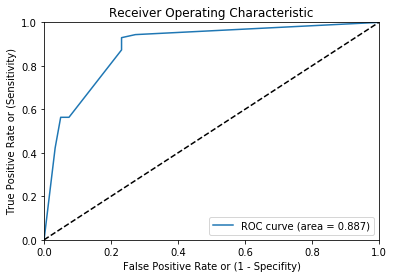

In [69]:
y_score = classifier.predict_proba(test.loc[:, ~(test.columns == 'Class')])
y_true = np.asarray(test['Class'])
y_score = y_score[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr, reorder = True)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()